In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy import signal

### The following algorithm creates rippled noise and white noise of the same duration. Rippled noise is the sharp rectangular step functions in the frequency domain (used for elevation experiment)

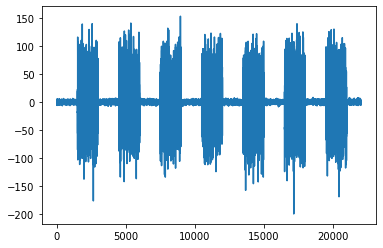

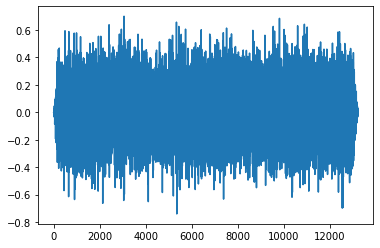

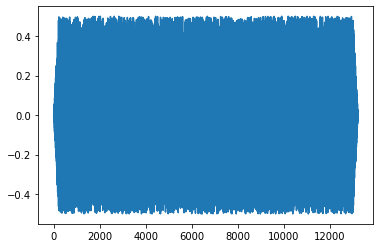

In [6]:
sr = 44100
duration = 0.300
max_amplitude = 0.7

x = np.random.rand(int(sr))

x_spec = np.real(np.fft.rfft(x))


band_width = 1500
attenuation_factor = 0.05

for i in range(0,len(x_spec),band_width*2):
    x_spec[i:i+band_width] *= attenuation_factor


y = x_spec[2:]
# plt.semilogx(y)
plt.plot(x_spec[2:])


y_time = np.fft.irfft(y)

# cut the noise
y_time = y_time[0:int(sr*duration)]


#create a onset ramp
y_time[0:int(sr*0.005)] *= np.linspace(0,1,int(sr*0.005))


y_time[y_time.shape[0]-int(sr*0.005):] *= np.linspace(1,0,int(sr*0.005))

# normalize and set amplitude
y_time /=y_time.max()
y_time *= max_amplitude


plt.figure()
plt.plot(y_time)


sf.write('/home/oesst/Desktop/rippled_noise_'+str(duration*1000)+'ms_'+str(band_width)+'_bandwidth.wav',y_time,samplerate=sr)



max_amplitude = 0.3

y_time = np.random.rand(int(sr))-0.5


# cut the noise
y_time = y_time[0:int(sr*duration)]


#create a onset ramp
y_time[0:int(sr*0.005)] *= np.linspace(0,1,int(sr*0.005))


y_time[y_time.shape[0]-int(sr*0.005):] *= np.linspace(1,0,int(sr*0.005))

plt.figure()
plt.plot(y_time)

# normalize and set amplitude
y_time /=y_time.max()
y_time *= max_amplitude


sf.write('/home/oesst/Desktop/white_noise_'+str(duration*1000)+'ms_'+str(band_width)+'_bandwidth.wav',y_time,samplerate=sr)


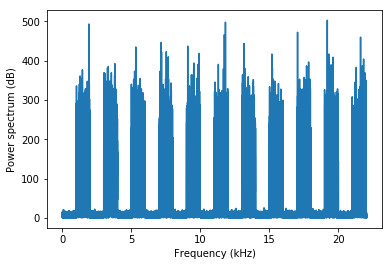

In [32]:
sr = 44100
duration = 2
max_amplitude = 0.7

x = np.random.rand(int(sr*duration))

x_spec = np.real(np.fft.rfft(x))


band_width = 1000



for i in range(0,len(x_spec),band_width*4):
    x_spec[i:i+band_width*2] *= 0.05

x_spec = x_spec[1:int(np.ceil((n+1)/2.0))] #Half of the spectrum

n = len(x) 
x_spec_mag = np.abs(x_spec) # Magnitude
# x_spec_mag = x_spec_mag / float(n)
# power spectrum
# x_spec_mag = x_spec_mag**2
if n % 2 > 0: # ffte odd 
    x_spec_mag[1:len(x_spec_mag)] = x_spec_mag[1:len(x_spec_mag)] * 2
else:# fft even
    x_spec_mag[1:len(x_spec_mag) -1] = x_spec_mag[1:len(x_spec_mag) - 1] * 2 

plt.figure()
freqAxis = np.arange(1,int(np.ceil((n+1)/2.0)), 1.0) * (sr / n);
plt.plot(freqAxis/1000.0, x_spec_mag) #Power spectrum
plt.xlabel('Frequency (kHz)'); plt.ylabel('Power spectrum (dB)');




### The following algorithm creates noise tones with frequency bands of different intensities (high and low notch region) as in Zonooz et al. 2019

In [7]:
oris = np.array([0,0.01,0.05,0.1,0.5,1.0])
nris = np.array([0,0.01,0.05,0.1,0.5,1.0])

oris = np.array([0.01,0.1,1.0])
nris = np.array([0.01,0.1,1.0])

sr = 44100
x = np.random.rand(sr)
x = np.real(np.fft.rfft(x))

for i in range(oris.shape[0]):
    for ii in range(nris.shape[0]):
        x_spec = np.copy(x)


        x_spec[500:6000] *= oris[i]
        x_spec[6000:9000] *= nris[ii]
        x_spec[9000:] *= oris[i]
#         x_spec[12000:] *= 0

        y = x_spec[2:]
        # plt.semilogx(y)

        y_time = np.fft.irfft(y)[int(sr/2):]
#         fig = plt.figure()
#         ax = fig.add_subplot(1,2,1)
#         ax.plot(x_spec[2:])

#         ax = fig.add_subplot(1,2,2)
#         ax.plot(y_time)

        sf.write('ori_{0:003.0f}_nri_{1:003.0f}.wav'.format(oris[i]*100,nris[ii]*100),y_time,samplerate=sr)
